In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error as mae

In [289]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [74]:
data='E:/MS/Research/Data/RA/new/Cleaned_Data.csv'

In [81]:
df_1 = pd.read_csv(data)

In [82]:
df_1.head()

,DATE,MONTH,TYPE,TOTAL (IN TONS)
0,1/31/2011,January,Curb Recycling,699.0
1,1/31/2011,January,Misc. Recycling,0.0
2,1/31/2011,January,Bottle Bill,0.0
3,1/31/2011,January,Scrap Metal,0.0
4,1/31/2011,January,Recycled Tires,14.0


In [83]:
columns = ['Date','Month','Type','Total']
df_1.columns = columns

In [106]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [107]:
df_new = df_1.pivot_table(index='Date',columns='Type', values='Total')

In [108]:
df_new.head()

Type,Asphalt Debris,Bottle Bill,Curb Garbage,Curb Recycling,E-Waste,Haz Waste,Misc. Garbage,Misc. Recycling,Recycled Tires,Scrap Metal,Sidewalk Debris,Yard Waste
Date,,,,,,,,,,,,
2011-01-31,0.0,0.0,6816.0,699.0,0.0,0.0,287.0,0.0,14.0,0.0,0.0,269.0
2011-02-28,0.0,0.0,6284.0,606.0,0.0,0.0,459.0,0.0,20.0,0.0,0.0,1090.0
2011-03-31,0.0,0.0,8484.0,716.0,0.0,0.0,1570.0,0.0,32.0,0.0,0.0,777.0
2011-04-30,0.0,0.0,8309.0,706.0,0.0,0.0,2471.0,0.0,83.0,0.0,0.0,0.0
2011-05-31,0.0,0.0,9314.0,760.0,0.0,0.0,3721.0,0.0,34.0,0.0,0.0,0.0


In [109]:
df_new.columns

Index(['Asphalt Debris', 'Bottle Bill', 'Curb Garbage', 'Curb Recycling',
       'E-Waste', 'Haz Waste', 'Misc. Garbage', 'Misc. Recycling',
       'Recycled Tires', 'Scrap Metal', 'Sidewalk Debris', 'Yard Waste'],
      dtype='object', name='Type')

In [110]:
df= df_new[['Curb Garbage','Curb Recycling','E-Waste','Misc. Garbage','Recycled Tires']]

In [111]:
df.head()

Type,Curb Garbage,Curb Recycling,E-Waste,Misc. Garbage,Recycled Tires
Date,,,,,
2011-01-31,6816.0,699.0,0.0,287.0,14.0
2011-02-28,6284.0,606.0,0.0,459.0,20.0
2011-03-31,8484.0,716.0,0.0,1570.0,32.0
2011-04-30,8309.0,706.0,0.0,2471.0,83.0
2011-05-31,9314.0,760.0,0.0,3721.0,34.0


In [112]:
df

Type,Curb Garbage,Curb Recycling,E-Waste,Misc. Garbage,Recycled Tires
Date,,,,,
2011-01-31,6816.0,699.0,0.0,287.0,14.0
2011-02-28,6284.0,606.0,0.0,459.0,20.0
2011-03-31,8484.0,716.0,0.0,1570.0,32.0
2011-04-30,8309.0,706.0,0.0,2471.0,83.0
2011-05-31,9314.0,760.0,0.0,3721.0,34.0
...,...,...,...,...,...
2019-07-31,8620.0,1479.0,24.0,1294.0,37.0
2019-08-31,7842.0,1414.0,23.0,2190.0,22.0
2019-09-30,7481.0,1354.0,24.0,1963.0,23.0


df.set_index('Date',inplace=True)

df['Date']=pd.to_datetime(df['Date'])

In [113]:
df.dtypes

Type
Curb Garbage      float64
Curb Recycling    float64
E-Waste           float64
Misc. Garbage     float64
Recycled Tires    float64
dtype: object

In [114]:
df = df.astype('int16')

df.index = df['Date']

del df['Date']

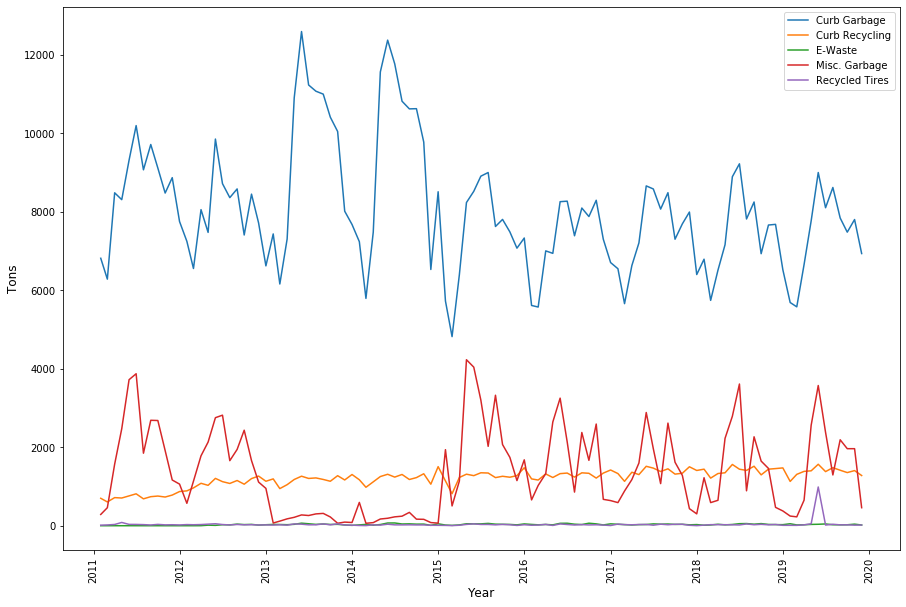

In [115]:
plt.figure(figsize=(15,10))
x = plt.plot(df)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tons', fontsize=12)
plt.xticks(rotation='vertical')
plt.legend(df)
plt.savefig('Trend.png', dpi=100)
plt.show()

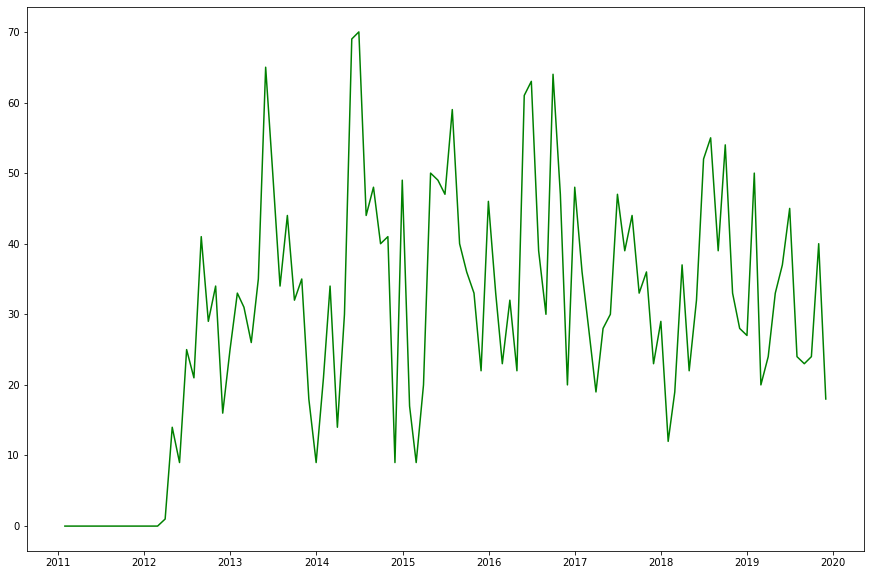

In [116]:
plt.figure(figsize=(15,10))
plt.plot(df['E-Waste'], color='g')

In [117]:
df.head()

Type,Curb Garbage,Curb Recycling,E-Waste,Misc. Garbage,Recycled Tires
Date,,,,,
2011-01-31,6816,699,0,287,14
2011-02-28,6284,606,0,459,20
2011-03-31,8484,716,0,1570,32
2011-04-30,8309,706,0,2471,83
2011-05-31,9314,760,0,3721,34


In [118]:
df.iloc[59]

Type
Curb Garbage      7332
Curb Recycling    1477
E-Waste             46
Misc. Garbage     1679
Recycled Tires      25
Name: 2015-12-31 00:00:00, dtype: int16

In [119]:
yearly_sum = df['E-Waste'].resample('Y').sum()
print(yearly_sum[1:])
print(yearly_sum[1:].describe())

Date
2012-12-31    215
2013-12-31    412
2014-12-31    469
2015-12-31    428
2016-12-31    482
2017-12-31    392
2018-12-31    410
2019-12-31    338
Freq: A-DEC, Name: E-Waste, dtype: int16
count      8.000000
mean     393.250000
std       84.753002
min      215.000000
25%      378.500000
50%      411.000000
75%      438.250000
max      482.000000
Name: E-Waste, dtype: float64


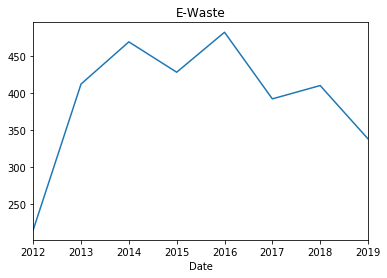

In [120]:
yearly_sum[1:].plot(title='E-Waste')

In [121]:
yearly_sum_curbgarbage = df['Curb Garbage'].resample('Y').sum()
print(yearly_sum_curbgarbage)
print(yearly_sum_curbgarbage.describe())

Date
2011-12-31    102404.0
2012-12-31     95045.0
2013-12-31    113856.0
2014-12-31    113109.0
2015-12-31     88936.0
2016-12-31     87325.0
2017-12-31     89231.0
2018-12-31     89192.0
2019-12-31     81480.0
Freq: A-DEC, Name: Curb Garbage, dtype: float64
count         9.000000
mean      95619.777778
std       11620.730848
min       81480.000000
25%       88936.000000
50%       89231.000000
75%      102404.000000
max      113856.000000
Name: Curb Garbage, dtype: float64


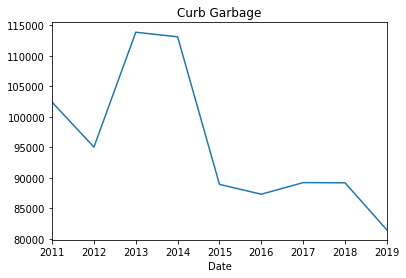

In [122]:
yearly_sum_curbgarbage.plot(title='Curb Garbage')

In [123]:
yearly_sum_curbrecycling = df['Curb Recycling'].resample('Y').sum()
print(yearly_sum_curbrecycling)
print(yearly_sum_curbrecycling.describe())

Date
2011-12-31     8864
2012-12-31    13177
2013-12-31    14106
2014-12-31    14669
2015-12-31    14944
2016-12-31    15472
2017-12-31    16501
2018-12-31    16926
2019-12-31    15098
Freq: A-DEC, Name: Curb Recycling, dtype: int16
count        9.000000
mean     14417.444444
std       2372.400794
min       8864.000000
25%      14106.000000
50%      14944.000000
75%      15472.000000
max      16926.000000
Name: Curb Recycling, dtype: float64


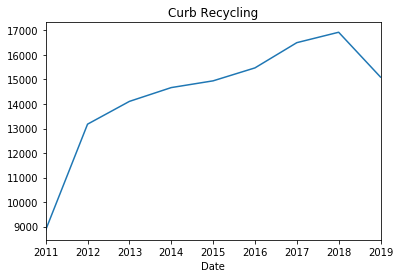

In [124]:
yearly_sum_curbrecycling.plot(title='Curb Recycling')

In [125]:
yearly_sum_miscgarbage = df[['Misc. Garbage']].resample('Y').sum()
print(yearly_sum_miscgarbage)
print(yearly_sum_miscgarbage.describe())

Type        Misc. Garbage
Date                     
2011-12-31          23736
2012-12-31          20948
2013-12-31           2185
2014-12-31           2381
2015-12-31          27042
2016-12-31          19843
2017-12-31          16418
2018-12-31          18194
2019-12-31          17505
Type   Misc. Garbage
count       9.000000
mean    16472.444444
std      8678.988638
min      2185.000000
25%     16418.000000
50%     18194.000000
75%     20948.000000
max     27042.000000


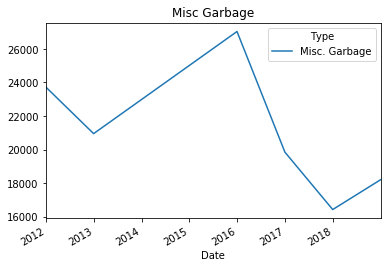

In [126]:
yearly_sum_miscgarbage.iloc[[0,1,4,5,6,7],0:].plot(title='Misc Garbage')

In [127]:
yearly_sum_RTires = df[['Recycled Tires']].resample('Y').sum()
print(yearly_sum_RTires)
print(yearly_sum_RTires.describe())

Type        Recycled Tires
Date                      
2011-12-31             364
2012-12-31             343
2013-12-31             335
2014-12-31             212
2015-12-31             279
2016-12-31             256
2017-12-31             319
2018-12-31             307
2019-12-31            1208
Type   Recycled Tires
count        9.000000
mean       402.555556
std        305.676754
min        212.000000
25%        279.000000
50%        319.000000
75%        343.000000
max       1208.000000


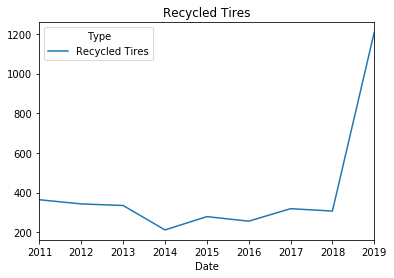

In [128]:
yearly_sum_RTires.plot(title='Recycled Tires')

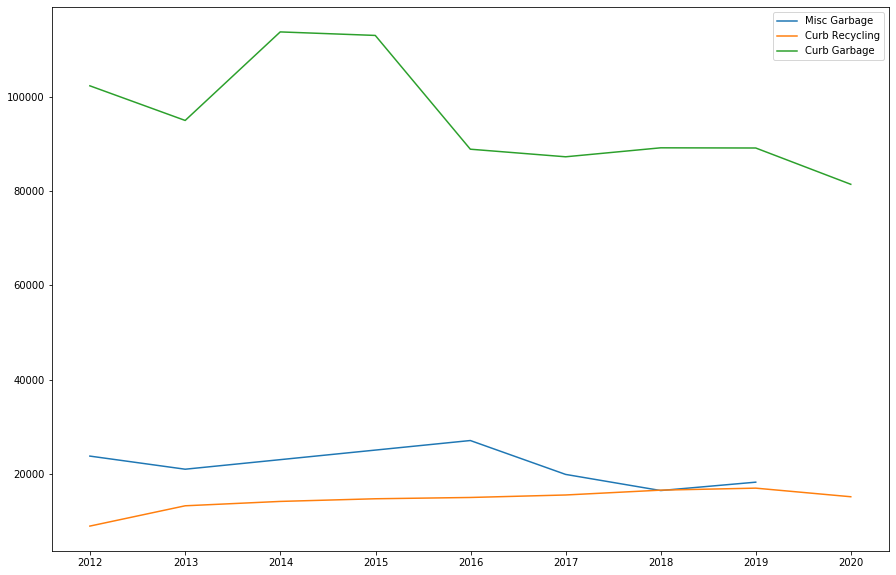

In [129]:
plt.figure(figsize=(15,10))
plt.plot(yearly_sum_miscgarbage.iloc[[0,1,4,5,6,7],0:], label='Misc Garbage')
plt.plot(yearly_sum_curbrecycling, label='Curb Recycling')
plt.plot(yearly_sum_curbgarbage, label='Curb Garbage')
plt.legend()
plt.show()

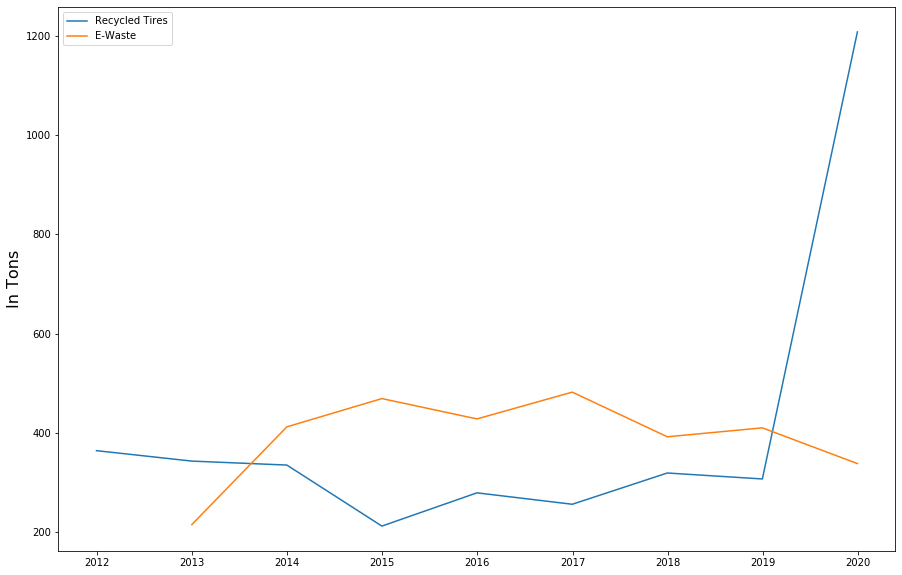

In [130]:
plt.figure(figsize=(15,10))
plt.plot(yearly_sum_RTires,label='Recycled Tires')
plt.plot(yearly_sum[1:], label='E-Waste')
plt.ylabel('In Tons', fontsize=16)
plt.legend()
plt.show()

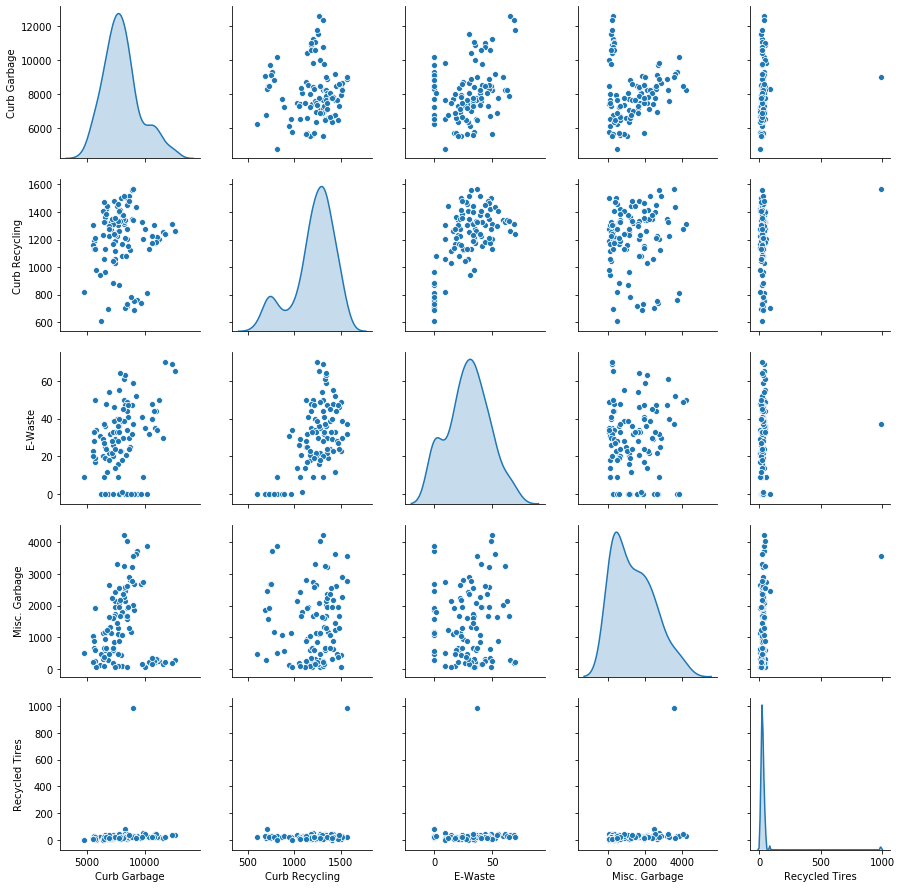

In [131]:
sns.pairplot(df, diag_kind='kde')

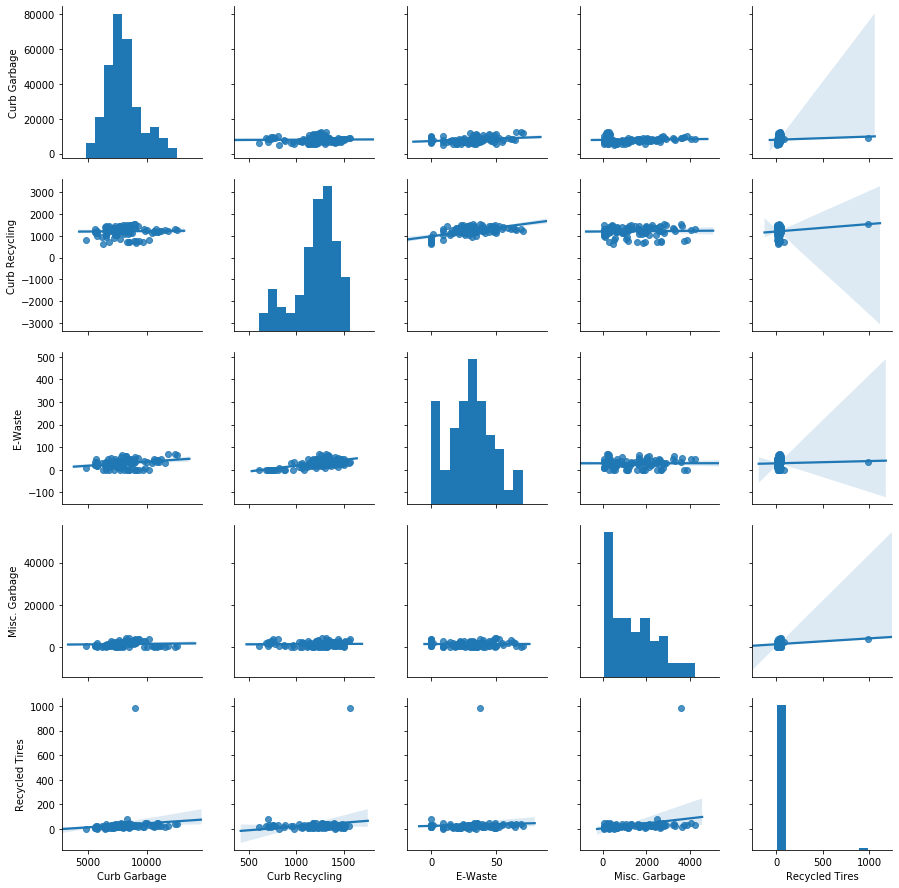

In [132]:
sns.pairplot(df, kind='reg')

df1 = 'E:/MS/Research/Data/RA/short_data1.xlsx'

df1=pd.read_excel(df1)

In [147]:
df1 = df.copy()

In [148]:
df1.dtypes

Type
Curb Garbage      int16
Curb Recycling    int16
E-Waste           int16
Misc. Garbage     int16
Recycled Tires    int16
dtype: object

In [149]:
columns = ['Curb_garbage','Curb_Recycling','E-Waste','Misc_Garbage','Recycled_tires']
df1.columns = columns

In [158]:
df1['Total'] = df1.sum(axis=1)

In [159]:
df1.head()

,Curb_garbage,Curb_Recycling,E-Waste,Misc_Garbage,Recycled_tires,Total
Date,,,,,,
2012-03-31,8055,1081,1,1782,30,10949.0
2012-04-30,7475,1029,14,2131,40,10689.0
2012-05-31,9854,1206,9,2753,50,13872.0
2012-06-30,8717,1123,25,2817,30,12712.0
2012-07-31,8361,1077,21,1658,20,11137.0


In [160]:
df1.drop(df1[df1['E-Waste']==0].index,axis=0, inplace=True)

In [161]:
df1.head()

,Curb_garbage,Curb_Recycling,E-Waste,Misc_Garbage,Recycled_tires,Total
Date,,,,,,
2012-03-31,8055,1081,1,1782,30,10949.0
2012-04-30,7475,1029,14,2131,40,10689.0
2012-05-31,9854,1206,9,2753,50,13872.0
2012-06-30,8717,1123,25,2817,30,12712.0
2012-07-31,8361,1077,21,1658,20,11137.0


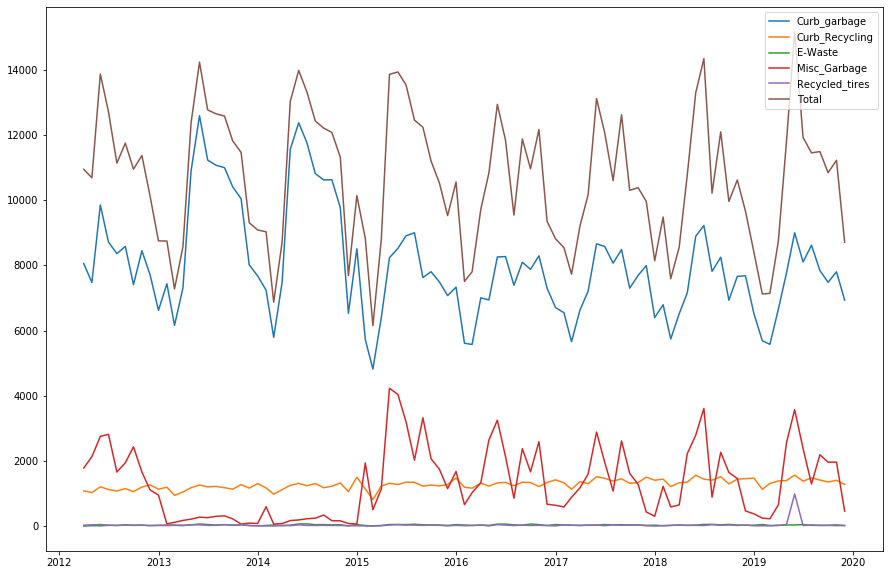

In [162]:
plt.figure(figsize=(15,10))
plt.plot(df1)
plt.legend(df1)
plt.show()

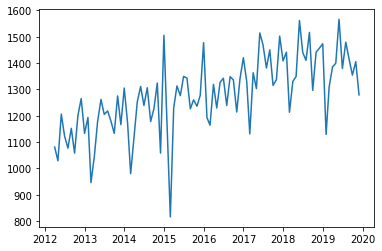

In [163]:
plt.plot(df1.Curb_Recycling)

In [53]:
df1.Curb_Recycling = df1['Curb_Recycling'].astype('float64')

In [164]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
data = df['Curb Recycling']
print(data.head())

Date
2011-01-31    699
2011-02-28    606
2011-03-31    716
2011-04-30    706
2011-05-31    760
Name: Curb Recycling, dtype: int16


In [165]:
data.asfreq('m')
print(data)

Date
2011-01-31     699
2011-02-28     606
2011-03-31     716
2011-04-30     706
2011-05-31     760
              ... 
2019-07-31    1479
2019-08-31    1414
2019-09-30    1354
2019-10-31    1405
2019-11-30    1279
Name: Curb Recycling, Length: 107, dtype: int16


In [56]:
data = data.astype('float64')
data.dtypes

dtype('float64')

In [166]:
train=data[:70]
test=data[70:]
print(test)

Date
2016-11-30    1341
2016-12-31    1420
2017-01-31    1329
2017-02-28    1131
2017-03-31    1363
2017-04-30    1303
2017-05-31    1514
2017-06-30    1468
2017-07-31    1381
2017-08-31    1450
2017-09-30    1315
2017-10-31    1337
2017-11-30    1502
2017-12-31    1408
2018-01-31    1441
2018-02-28    1213
2018-03-31    1330
2018-04-30    1349
2018-05-31    1561
2018-06-30    1440
2018-07-30    1410
2018-08-31    1516
2018-09-30    1296
2018-10-31    1441
2018-11-30    1456
2018-12-31    1473
2019-01-31    1129
2019-02-28    1309
2019-03-31    1385
2019-04-30    1399
2019-05-30    1566
2019-06-30    1379
2019-07-31    1479
2019-08-31    1414
2019-09-30    1354
2019-10-31    1405
2019-11-30    1279
Name: Curb Recycling, dtype: int16


In [167]:
model = ExponentialSmoothing(data, trend='additive',seasonal='multiplicative',damped=False,seasonal_periods=12)
model_fit=model.fit()

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [174]:
yhat = model_fit.predict(start=0, end=106)

In [175]:
yhat.tail()

Date
2019-07-31    1425.111518
2019-08-31    1442.214801
2019-09-30    1366.561098
2019-10-31    1415.806837
2019-11-30    1402.786635
dtype: float64

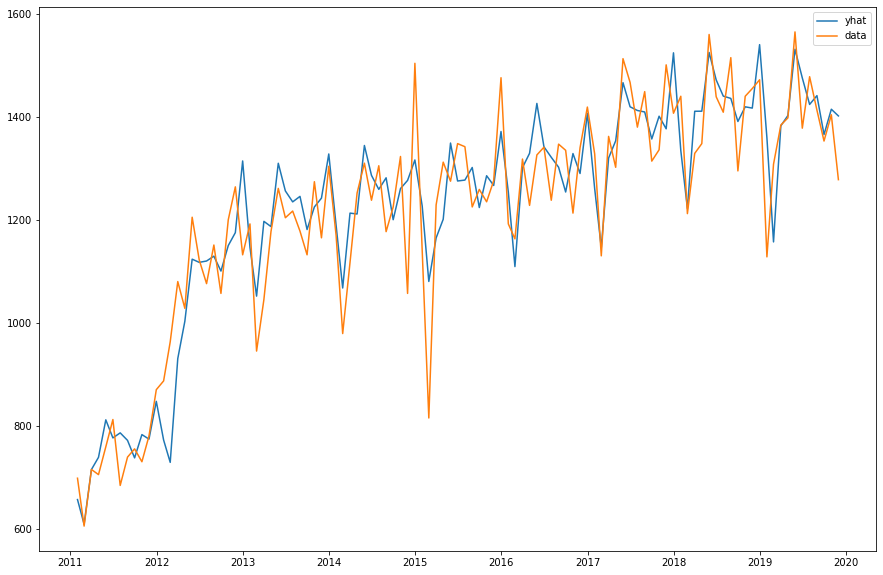

In [176]:
plt.figure(figsize=(15,10))
plt.plot(yhat,label='yhat')
plt.plot(data,label='data')
plt.legend()

In [177]:
error = yhat-data

In [178]:
(abs(error)).mean()

64.97087340151518

In [179]:
mape(data,yhat)

5.606965215773242

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


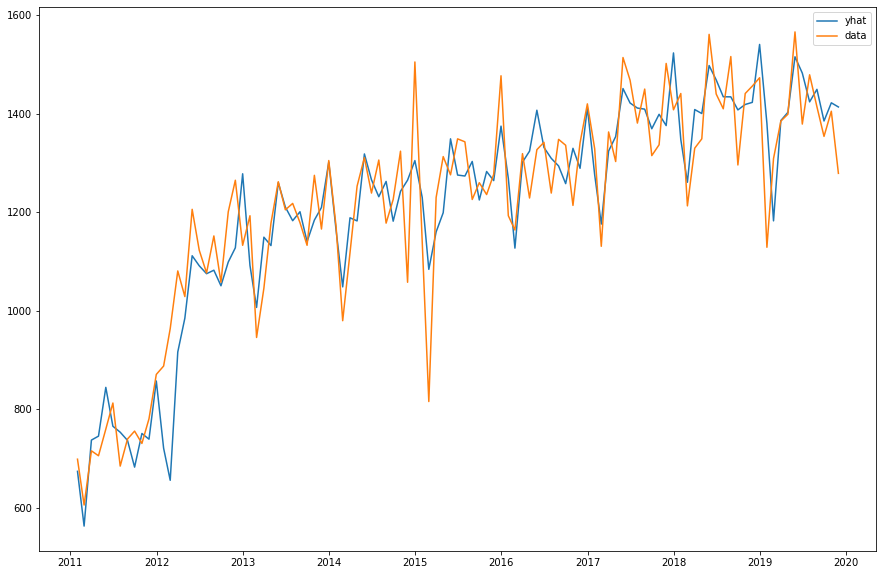

In [181]:
model = ExponentialSmoothing(data, trend='mul',seasonal='add',damped=False,seasonal_periods=12)
model_fit=model.fit()
yhat = model_fit.predict(start=0, end=106)
plt.figure(figsize=(15,10))
plt.plot(yhat,label='yhat')
plt.plot(data,label='data')
plt.legend()

In [182]:
error = yhat-data
(abs(error)).mean()

67.08929169261

# Curb Garbage Forecasting

In [183]:
data1= df['Curb Garbage']

In [184]:
data1.dtypes

dtype('int16')

In [185]:
data1=data1.astype('float64')

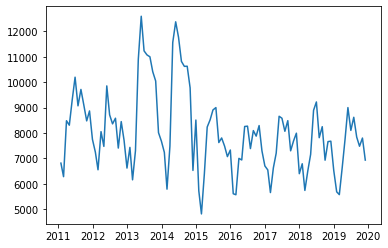

In [186]:
plt.plot(data1)
plt.show()

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


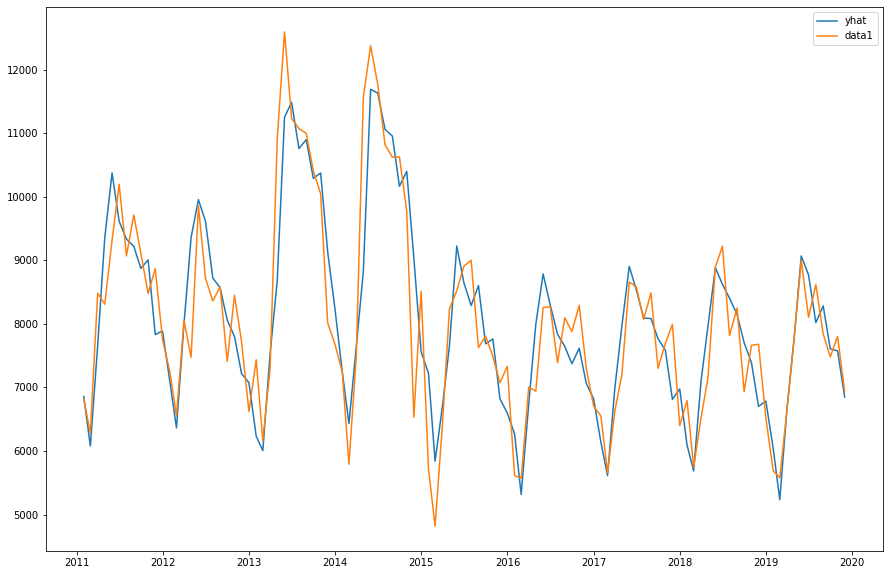

In [188]:
model = ExponentialSmoothing(data1,seasonal='mul',damped=False,seasonal_periods=12)
model_fit=model.fit()
yhat = model_fit.predict(start=0, end=106)
plt.figure(figsize=(15,10))
plt.plot(yhat,label='yhat')
plt.plot(data1,label='data1')
plt.legend()

In [189]:
mae(data1,yhat)

521.159232884074

In [190]:
mape(data1,yhat)

6.622353024548387

# Misc Garbage Forecasting

In [191]:
data2 = df['Misc. Garbage']

In [192]:
data2 = data2.astype('float64')

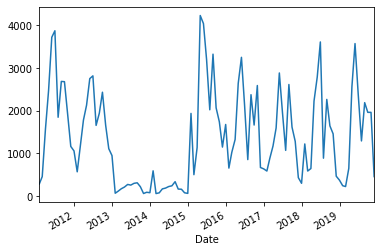

In [193]:
data2.plot()

In [194]:
len(data2)

107

In [195]:
data2.describe()

count     107.000000
mean     1385.532710
std      1094.584166
min        62.000000
25%       358.000000
50%      1165.000000
75%      2133.000000
max      4230.000000
Name: Misc. Garbage, dtype: float64

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


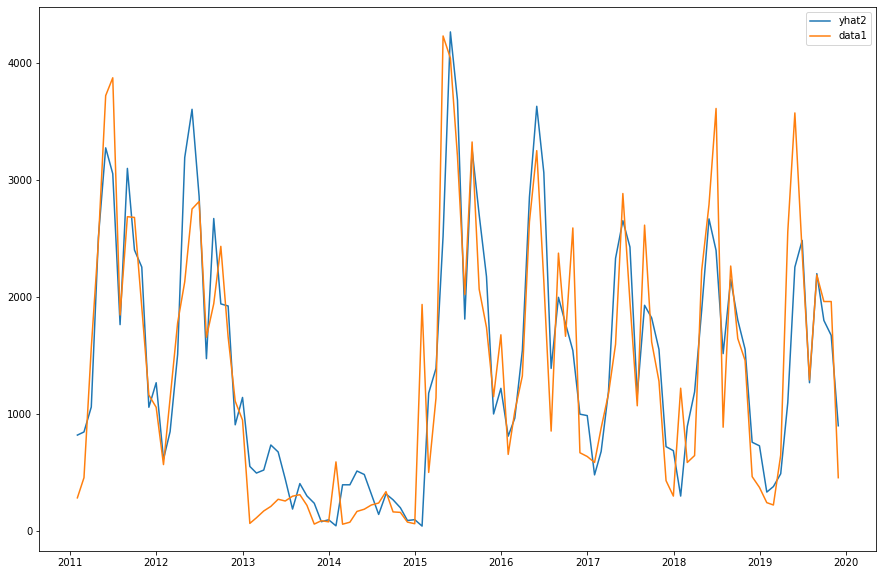

In [198]:
model = ExponentialSmoothing(data2,seasonal='mul',damped=False,seasonal_periods=12)
model_fit=model.fit()
yhat2 = model_fit.predict(start=0, end=106)
plt.figure(figsize=(15,10))
plt.plot(yhat2,label='yhat2')
plt.plot(data2,label='data1')
plt.legend()

In [199]:
mae(data2,yhat2)

361.8478762724579

In [200]:
mape(data2,yhat2)

60.071116672858324

In [201]:
data21 = data2.iloc[48:]

In [202]:
type(data21)

pandas.core.series.Series

In [203]:
data21.head()

Date
2015-01-31    1938.0
2015-02-28     504.0
2015-03-31    1140.0
2015-04-30    4230.0
2015-05-31    4041.0
Name: Misc. Garbage, dtype: float64

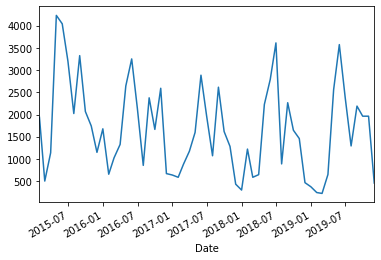

In [204]:
data21.plot()

In [205]:
len(data21)

59

In [220]:
model = ExponentialSmoothing(data21,trend='add',seasonal='add',damped=False,seasonal_periods=12)
model_fit=model.fit(use_boxcox=False)
yhat21 = model_fit.predict(start=0, end=58)

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


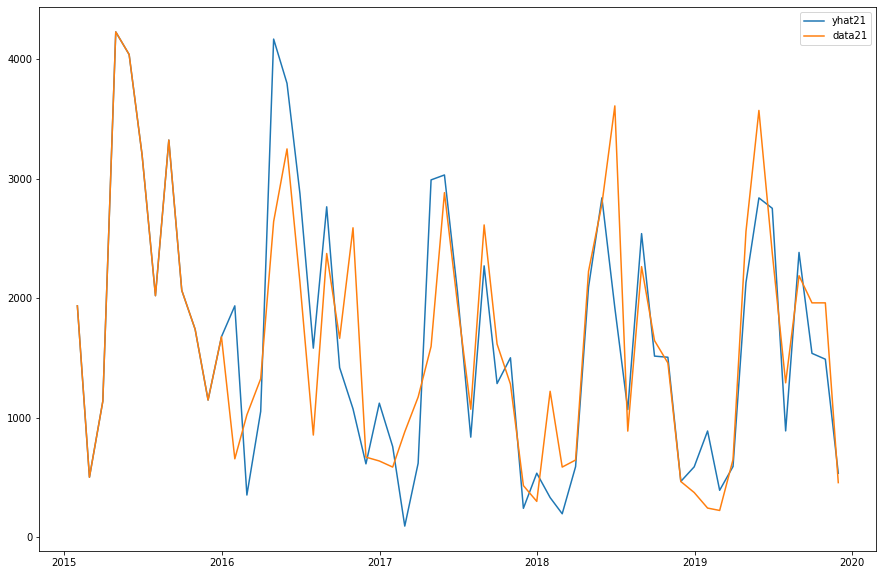

In [221]:
plt.figure(figsize=(15,10))
plt.plot(yhat21,label='yhat21')
plt.plot(data21,label='data21')
plt.legend()

In [222]:
mae(data21,yhat21)

359.31951312048363

In [223]:
mape(data21,yhat21)

32.37092032302968

In [224]:
model_fit.params

{'smoothing_level': 0.10526315789473684,
 'smoothing_slope': 0.10526315789473684,
 'smoothing_seasonal': 0.42105263157894735,
 'damping_slope': nan,
 'initial_level': 930.8,
 'initial_slope': 0.0,
 'initial_seasons': array([1007.2, -426.8,  209.2, 3299.2, 3110.2, 2271.2, 1092.2, 2394.2,
        1137.2,  811.2,  219.2,  748.2]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Recycled Tires Forecast

In [225]:
df3 = df['Recycled Tires']

In [226]:
df3 = df3.iloc[60:]

In [227]:
df3.describe()

count     47.000000
mean      44.468085
std      140.907748
min        2.000000
25%       16.500000
50%       24.000000
75%       32.000000
max      987.000000
Name: Recycled Tires, dtype: float64

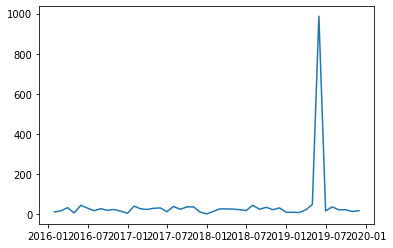

In [228]:
plt.plot(df3)
plt.show()

In [181]:
df3 = df3.astype('float64')
print(df3.dtypes, df3.index)

float64 DatetimeIndex(['2016-01-31', '2016-02-28', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-30', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


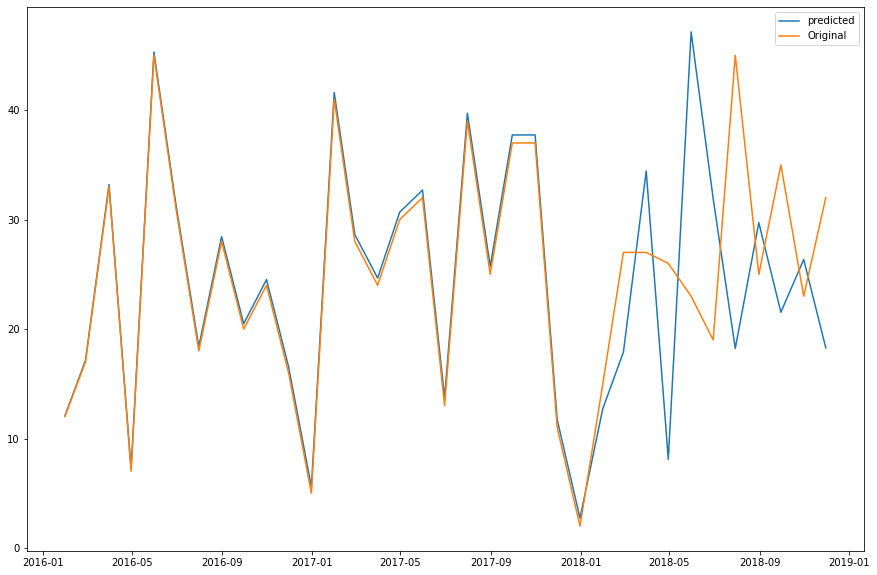

In [193]:
model = ExponentialSmoothing(df3,trend ='mul',seasonal='additive',damped=False,seasonal_periods=24)
model_fit=model.fit()
yhat3 = model_fit.predict(start=0, end=34)
plt.figure(figsize=(15,10))
plt.plot(yhat3,label='predicted')
plt.plot(df3,label='Original')
plt.legend()

In [194]:
mape(df3,yhat3)

16.903518074504742

In [195]:
mae(df3,yhat3)

4.240866128560746

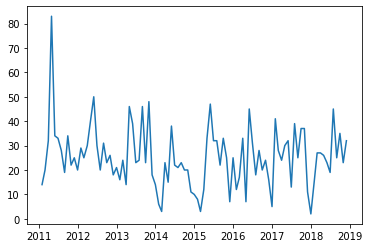

In [196]:
plt.plot(df['Recycled Tires'])

# E-Waste Forecasting

In [234]:
df4 = df1['E-Waste']

Text(0.5, 0, 'E-Waste')

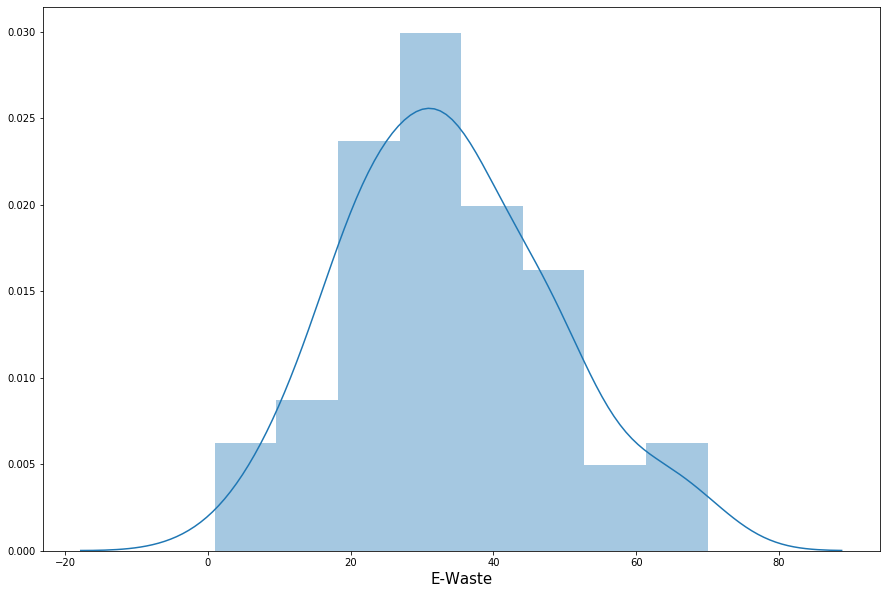

In [235]:
plt.figure(figsize=(15,10))
sns.distplot(df4)
plt.xlabel('E-Waste', fontsize=15)

In [236]:
df4.describe()

count    93.000000
mean     33.827957
std      14.637373
min       1.000000
25%      23.000000
50%      33.000000
75%      44.000000
max      70.000000
Name: E-Waste, dtype: float64

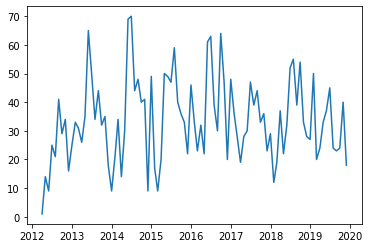

In [237]:
plt.plot(df4)

df4=df4.iloc[24:]

In [238]:
df4.describe()

count    93.000000
mean     33.827957
std      14.637373
min       1.000000
25%      23.000000
50%      33.000000
75%      44.000000
max      70.000000
Name: E-Waste, dtype: float64

Text(0, 0.5, 'Tons')

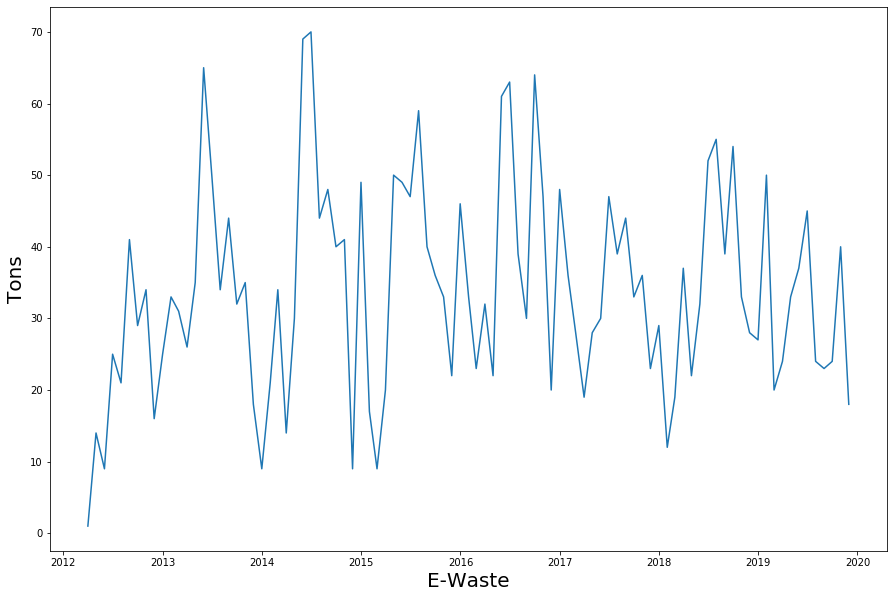

In [372]:
plt.figure(figsize=(15,10))
plt.plot(df4)
plt.xlabel('E-Waste', fontsize=20)
plt.ylabel('Tons', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [27]:
df4=df4.astype('float64')

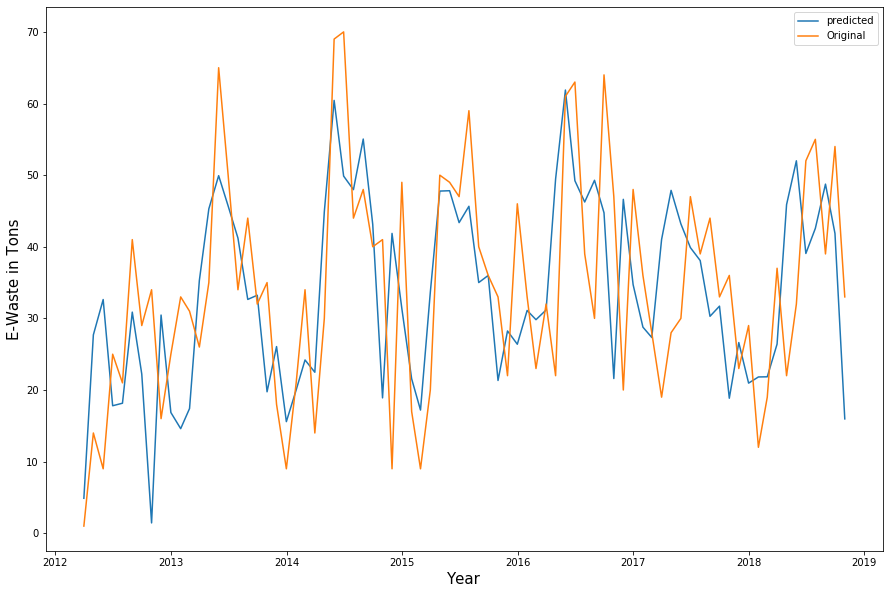

In [354]:
model = ExponentialSmoothing(df4[:80],seasonal='add',damped=False,seasonal_periods=24)
model_fit=model.fit()
yhat4 = model_fit.predict(start=1, end=80)
yhat4.index=df4[0:80].index
plt.figure(figsize=(15,10))
plt.plot(yhat4,label='predicted')
plt.plot(df4[:80],label='Original')
plt.xlabel('Year', fontsize=15)
plt.ylabel('E-Waste in Tons', fontsize=15)
plt.legend()

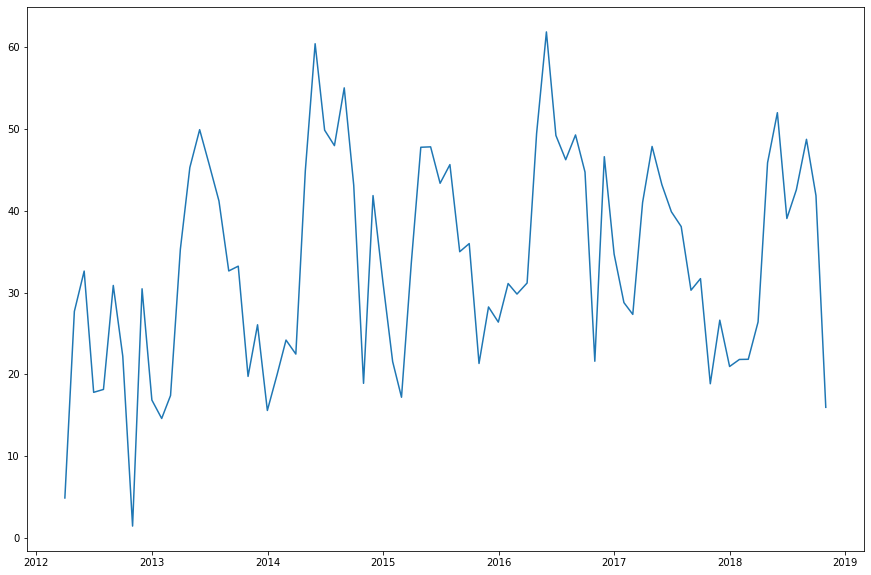

In [355]:
plt.figure(figsize=(15,10))
plt.plot(yhat4,label='predicted')

In [361]:
mape(df4[:80],yhat4)

47.931621850407524

In [362]:
mae(df4[:80],yhat4)

11.148595896909853

In [363]:
model_fit.params

{'smoothing_level': 0.24773751304139807,
 'smoothing_slope': nan,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 10.916923232993552,
 'initial_slope': nan,
 'initial_seasons': array([ -5.83598279,  -5.02316878,  15.53729448,  25.10131053,
         12.16182463,  11.72400039,  18.78216586,  10.59499996,
        -13.10234522,  12.31401817,   0.05970199,  -6.19233427,
         -7.44323315,   8.30586553,  18.38621228,  18.13347258,
         13.88253115,  12.29442422,   3.04221795,   3.78820633,
        -10.13227942,  -3.3845336 ,  -9.63777043,  -6.55681854]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [364]:
future_predict = model_fit.predict(start=71, end=93)

In [365]:
list(future_predict.round(2))

[21.82,
 21.84,
 26.41,
 45.88,
 52.0,
 39.06,
 42.57,
 48.75,
 41.86,
 15.97,
 41.38,
 29.13,
 22.88,
 21.63,
 37.38,
 47.46,
 47.2,
 42.95,
 41.37,
 32.11,
 32.86,
 18.94,
 25.69]

In [366]:
df_final = df4[70:]
df_final.index =range(71,94)

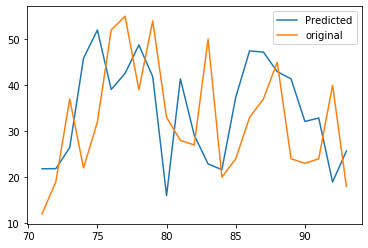

In [367]:
plt.plot(future_predict,label='Predicted')
plt.plot(df_final,label='original')
plt.legend()

In [368]:
len(future_predict)

23

In [369]:
len(df4[70:])

23

In [370]:
year_2020 = model_fit.predict(start=94, end=106)

In [371]:
year_2020.astype('int16')

94     19
95     22
96     23
97     24
98     44
99     54
100    41
101    40
102    47
103    39
104    15
105    41
106    29
dtype: int16

# AR, ARIMA

In [340]:
train = df4[:70]
test = df4[70:]

In [341]:
len(test)

23

In [342]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [343]:
model_ar = AR(train).fit()

In [344]:
prediction=model_ar.predict(start=70, end=92)
model_ar.aic

5.403502687188988

In [345]:
prediction.index = test.index

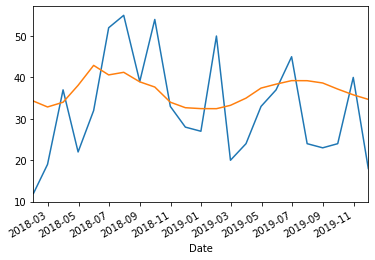

In [346]:
test.plot()
prediction.plot()

In [347]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults

In [291]:
model_arima = ARIMA(train, order=(5,2,2))
model_arima_fit = model_arima.fit()
fc, sc, config = model_arima_fit.forecast(23)

In [292]:
model_arima_fit.aic

570.3719447100838

In [293]:
fcseries= pd.Series(fc, index=test.index)

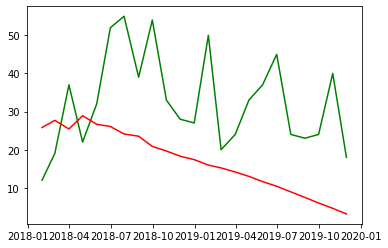

In [294]:
plt.plot(test,'-g')
plt.plot(fcseries,'-r')

In [287]:
import itertools
p=d=q=range(1,10)
pdq = list(itertools.product(p,d,q))

In [290]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit(disp=-1)
        print(params, model_arima_fit.aic)
    except:
        continue

(1, 1, 1) 571.7320953959494
(1, 1, 2) 573.682767605661
(1, 2, 1) 583.8223973094841
(2, 1, 1) 573.6993817520844
(2, 1, 2) 580.0035593203368
(2, 2, 1) 579.9137334006073
(2, 2, 3) 576.7191503044847
(2, 2, 4) 573.6244439948211
(3, 1, 1) 575.4179331229269
(3, 1, 2) 583.0926677499975
(3, 2, 1) 580.5821676926748
(3, 2, 2) 581.202297073026
(3, 2, 3) 580.8211148608705
(3, 2, 4) 582.8710652134316
(4, 1, 1) 583.4257024774006
(4, 1, 2) 579.4255118225972
(4, 1, 3) 574.1403559167292
(4, 1, 4) 574.7023681184196
(4, 2, 1) 581.098840174111
(4, 2, 2) 584.5903410111605
(4, 2, 3) 580.0022041697007
(5, 1, 1) 570.3883459199294
(5, 1, 2) 570.5589328263704
(5, 1, 3) 572.5552215465257
(5, 1, 4) 575.1858817424244
(5, 2, 1) 581.9796085200533
(5, 2, 2) 570.3719447100838
(5, 2, 3) 567.0988157916784
(6, 1, 1) 571.0021932035529
(6, 1, 2) 574.4076687223264
(6, 1, 3) 574.5655820972155
(6, 2, 1) 581.7643192021387
(6, 2, 3) 574.3832854792947
(7, 1, 1) 572.5298525181039
(7, 1, 3) 572.7515082568738
(7, 1, 5) 575.710636016

In [303]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=402.539, BIC=406.152, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 24); AIC=394.927, BIC=402.154, Fit time=0.777 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=398.203, BIC=403.623, Fit time=0.168 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 24); AIC=400.395, BIC=405.815, Fit time=0.549 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 24); AIC=388.948, BIC=397.982, Fit time=1.17

In [304]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 0, 24), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [305]:
future_forecast = stepwise_model.predict(n_periods=23)

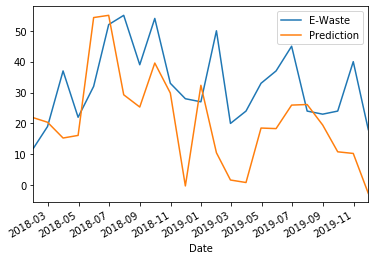

In [306]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [307]:
mape(test,future_forecast)

56.83210127767079

In [308]:
mae(test,future_forecast)

15.526307173217624

C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pradeep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\U

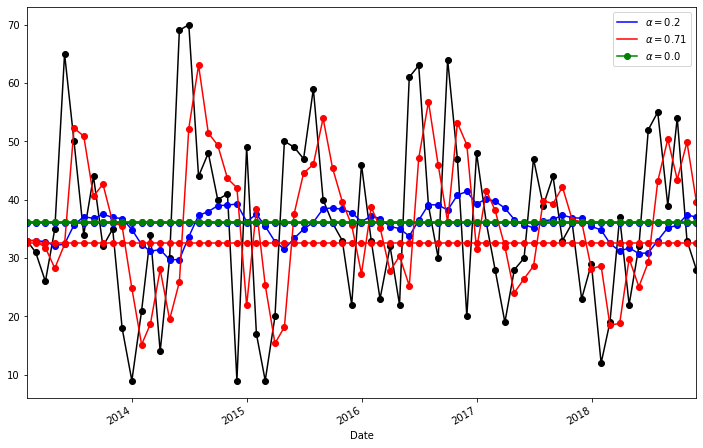

41.87124468392907


In [33]:
fit1 = SimpleExpSmoothing(df4).fit(smoothing_level=0.1,optimized=False)
fcast1 = fit1.forecast(71).rename(r'$\alpha=0.2$')
fcast1.index=df4.index
fit2 = SimpleExpSmoothing(df4).fit(smoothing_level=0.61,optimized=False)
fcast2 = fit2.forecast(71).rename(r'$\alpha=0.71$')
fcast2.index=df4.index
fit3 = SimpleExpSmoothing(df4).fit()
fcast3 = fit3.forecast(71).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fcast3.index=df4.index
ax = df4.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)

plt.show()
print(mape(df4,fcast2))